In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import pylab
import json
import os
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
annType = ['segm','bbox']
annType = annType[1]      #specify type here
print 'Running demo for *%s* results.'%(annType)

Running demo for *bbox* results.


In [3]:
#initialize COCO ground truth api
HOMEDIR = os.path.expanduser("~")
dataDir='{}/data/mscoco'.format(HOMEDIR)
dataType='test-dev2015'
annFile = '%s/annotations/image_info_%s.json'%(dataDir,dataType)
cocoGt=COCO(annFile)

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


In [4]:
#initialize COCO detections api
resFile='../results/detections_{}_ssd500_results.json'.format(dataType)

In [5]:
use_small_file = True
if use_small_file:
    smallResFile = '../results/ssd500_small.json'
    if not os.path.exists(smallResFile):
        cocoDt=cocoGt.loadRes(resFile)
        # Sample 2000 images.
        smallIds = sorted(cocoDt.getImgIds())[0:2000]
        annIds = cocoDt.getAnnIds(imgIds=smallIds)
        cocoDtSmall = cocoDt.loadAnns(annIds)
        with open(smallResFile, 'w') as f:
            json.dump(cocoDtSmall, f)
    cocoDt=cocoGt.loadRes(smallResFile)
else:
    cocoDt=cocoGt.loadRes(resFile)

Loading and preparing results...     
DONE (t=5.81s)
creating index...
index created!


In [6]:
# randomly pick one image
imgIds=sorted(cocoGt.getImgIds())
imgIds=imgIds[0:2000]
imgId = imgIds[np.random.randint(2000)]
img = cocoGt.loadImgs(imgId)[0]
I = io.imread('%s/images/test2015/%s'%(dataDir,img['file_name']))

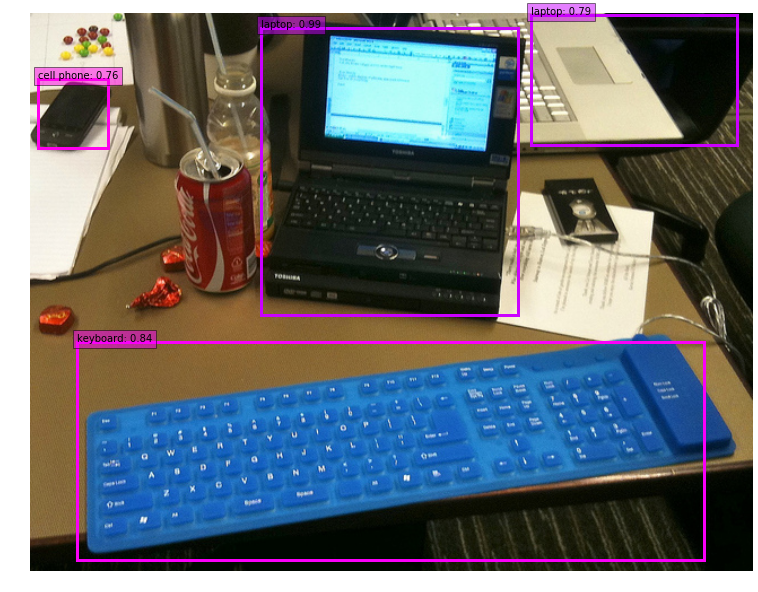

In [7]:
# visialuze high confidence detections
fig = plt.figure(figsize=[15,10])

# detections
plt.imshow(I); plt.axis('off');
annIds = cocoDt.getAnnIds(imgIds=imgId)
anns = cocoDt.loadAnns(annIds)
fanns = []
for ann in anns:
    if ann['score'] > 0.6:
        fanns.append(ann)
cocoDt.showAnns(fanns)